In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('Daily_Attendance_By_School.csv',index_col='Date',parse_dates=True)

In [3]:
data['att percent']= (data['Present'])/(data['Enrolled']-data['Released'])

In [4]:
data['School'].nunique()

1594

In [5]:
from collections import OrderedDict
data_dict= OrderedDict()

In [6]:
data.head()

,School,SchoolYear,Enrolled,Present,Absent,Released,att percent
Date,,,,,,,
2006-09-05,01M015,20062007,252,226,26,0,0.896825
2006-09-06,01M015,20062007,248,227,21,0,0.915323
2006-09-07,01M015,20062007,245,228,17,0,0.930612
2006-09-08,01M015,20062007,246,226,20,0,0.918699
2006-09-11,01M015,20062007,248,223,25,0,0.899194


In [7]:
for i in data['School'].unique():
    data_dict[i]= data.loc[data['School']==i,'att percent']

In [8]:
data_dict[tuple(data_dict.keys())[0]].head()

Date
2006-09-05    0.896825
2006-09-06    0.915323
2006-09-07    0.930612
2006-09-08    0.918699
2006-09-11    0.899194
Name: att percent, dtype: float64

In [9]:
del data_dict['13K412']

In [10]:
for i,j in data_dict.items():
    if len(j)!= j.index.nunique():
        print(i)

In [11]:
new_data= pd.concat(data_dict.values(),axis=1,keys= data_dict.keys())

In [12]:
new_data= new_data.loc['2007-01-01':'2008-01-01']

In [13]:
new_data.shape

(185, 1593)

In [14]:
new_data.dropna(axis=1,how='all',inplace=True)

In [15]:
new_data['mean']=new_data.mean(axis=1,skipna=True)

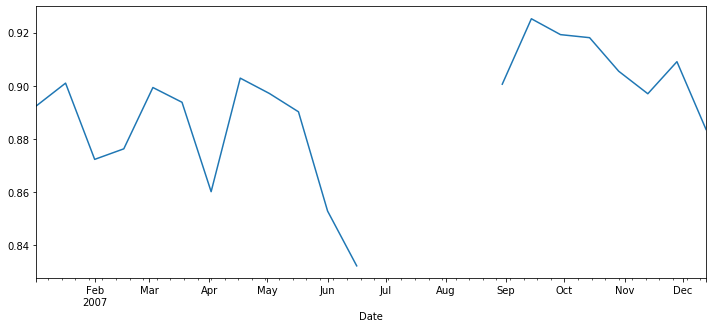

In [16]:
new_data['mean'].resample(rule='15D').mean().plot(figsize=(12,5))

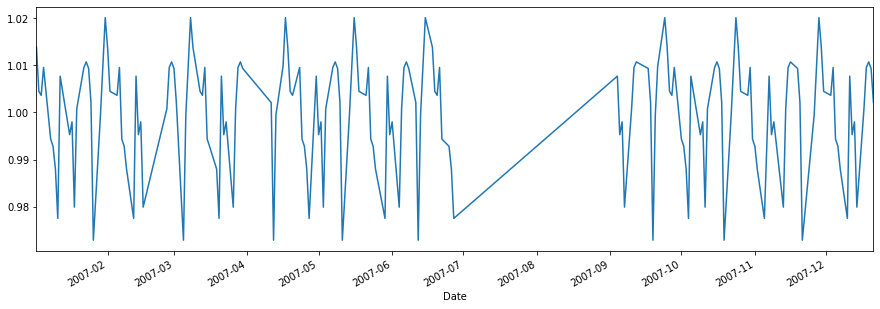

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(new_data['mean'], model='multiplicative',freq=21)  # model='mul' also works
result.seasonal.plot(figsize=(15,5));

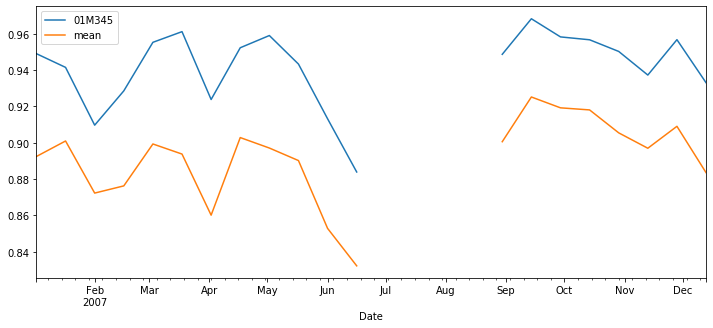

In [18]:
new_data[[new_data.columns[17],'mean']].resample(rule='15D').mean().plot(figsize=(12,5))

In [19]:
new_data.drop(columns='01M056',inplace=True)

KeyError: "['01M056'] not found in axis"

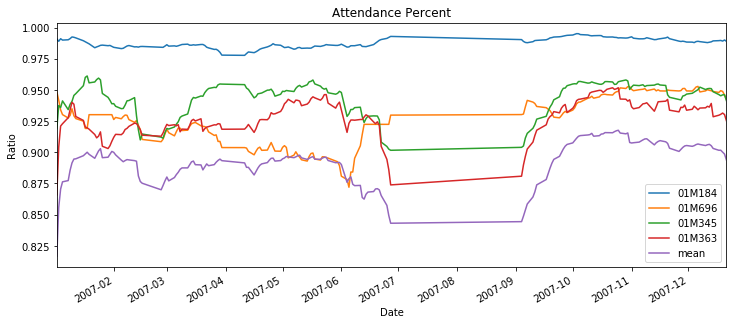

In [57]:
a=new_data[[new_data.columns[11],new_data.columns[27],new_data.columns[17],new_data.columns[19],'mean']].ewm(span=20,ignore_na=True).mean()
fig1=a.plot(figsize=(12,5),title='Attendance Percent').get_figure()
plt.ylabel('Ratio')
fig1.savefig('att_percent.jpg')

In [36]:
from scipy.stats import pearsonr

In [320]:
s= new_data[[new_data.columns[3],'mean']].copy()
s.dropna(inplace=True)
pearsonr(s.iloc[:,0],s['mean'])

(0.8491616955298418, 2.4026106153844778e-52)

In [58]:
print('Schoolid\tCorrelation')
#for i in range(250):
for i in (11,27,17,19):
    name= new_data.columns[i]
    s= new_data[[name,'mean']].copy()
    
    s=s.resample(rule='4D').mean()
    s.dropna(inplace=True)
    #s=s.ewm(span=5,adjust=False).mean()
    corr=pearsonr(s[name],s['mean'])[0]
    #if corr<0.2:
    print(new_data.columns[i],"\t\t",corr)#,"\t",len(s))

Schoolid	Correlation
01M184 		 0.08460048793701398
01M696 		 0.017659579853166116
01M345 		 0.756557080454879
01M363 		 0.7624066348989275


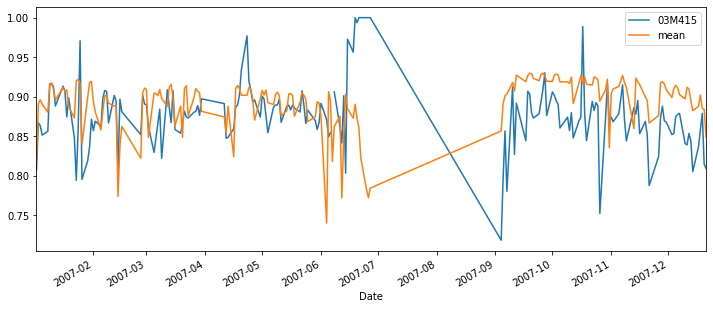

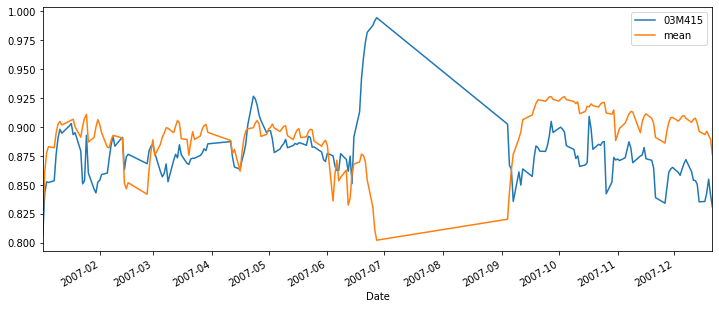

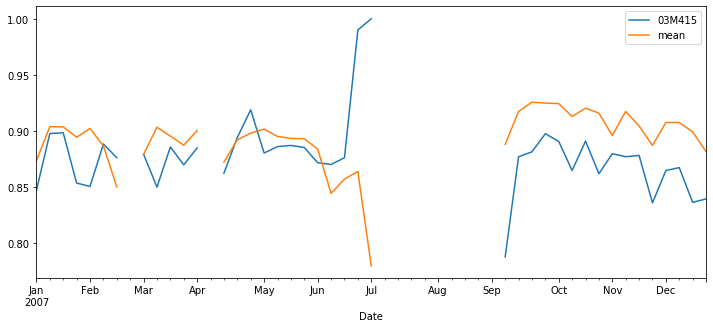

In [360]:
i=156
new_data[[new_data.columns[i],'mean']].plot(figsize=(12,5))
new_data[[new_data.columns[i],'mean']].ewm(span=5,ignore_na=True).mean().plot(figsize=(12,5))
new_data[[new_data.columns[i],'mean']].resample(rule='W').mean().plot(figsize=(12,5))

In [219]:
s.ewm()

'07X220'

In [348]:
name= new_data.columns[24]
s= new_data[[name,'mean']].copy()
#s=s.resample(rule='4D').mean()
s.dropna(inplace=True)
s=s.ewm(span=5,adjust=False,ignore_na=True).mean()
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2007-09-04 to 2007-12-21
Data columns (total 2 columns):
01M515    72 non-null float64
mean      72 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [350]:
corr=pearsonr(s[name],s['mean'])[0]
corr

0.44023632174378713

In [272]:
s=s.resample(rule='w').mean()

In [274]:
s.dropna(inplace=True)

In [275]:
pearsonr(s[nam],s['mean'])[0]

0.9161073354561621